In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns

In [451]:
train = pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis


In [452]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\3804807490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='RdBu_r')


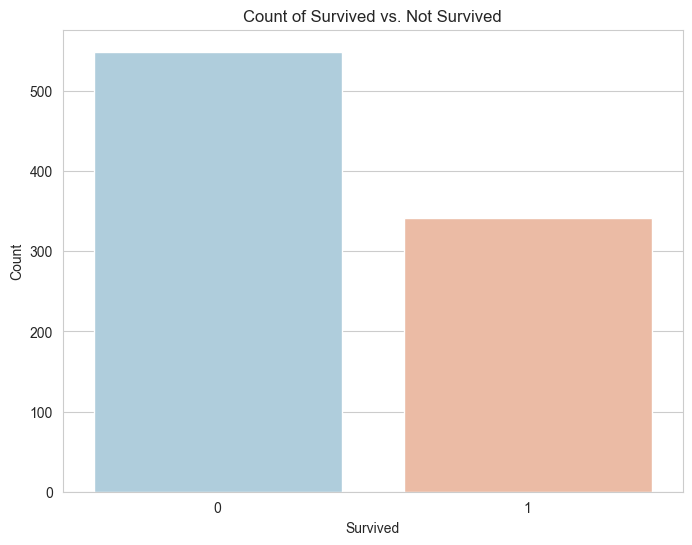

In [453]:
sns.set_style('whitegrid')

# Vẽ biểu đồ cột số lượng người sống sót và không sống sót
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train, palette='RdBu_r')

# Thêm tiêu đề và nhãn trục
plt.title('Count of Survived vs. Not Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

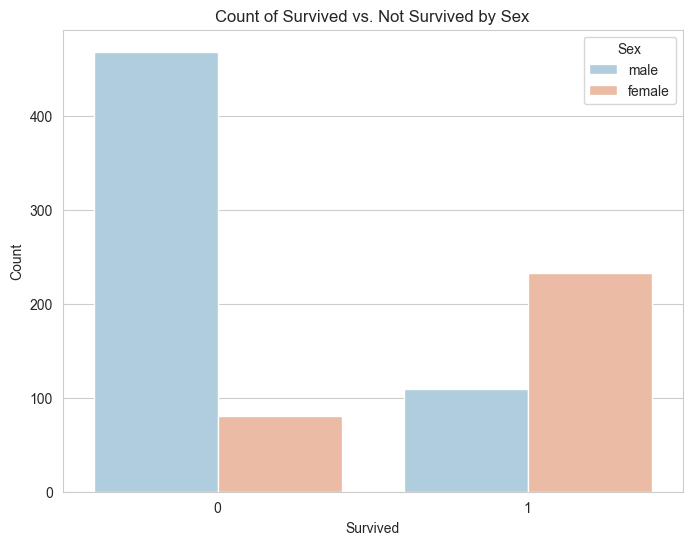

In [454]:
# Đặt kiểu hiển thị của seaborn
sns.set_style('whitegrid')

# Vẽ biểu đồ cột số lượng người sống sót và không sống sót theo giới tính
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

# Thêm tiêu đề và nhãn trục
plt.title('Count of Survived vs. Not Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

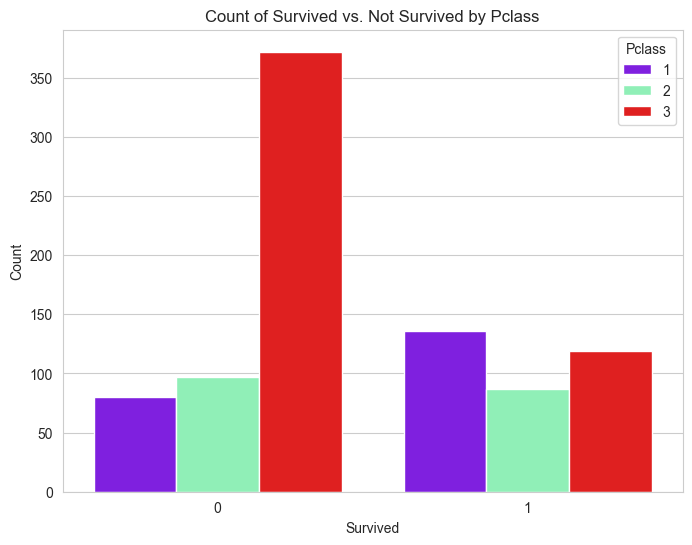

In [455]:
# Đặt kiểu hiển thị của seaborn
sns.set_style('whitegrid')

# Vẽ biểu đồ cột số lượng người sống sót và không sống sót theo hạng vé
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

# Thêm tiêu đề và nhãn trục
plt.title('Count of Survived vs. Not Survived by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

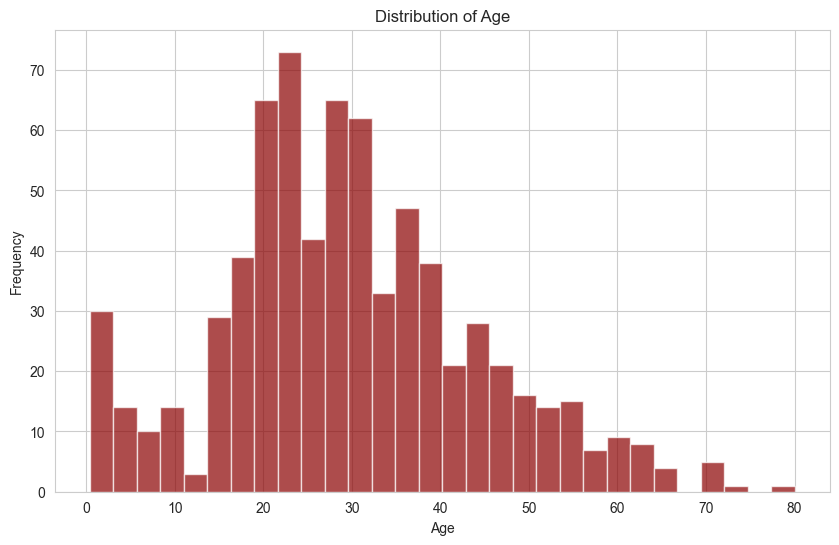

In [456]:
# Vẽ biểu đồ histogram cho cột 'Age'
plt.figure(figsize=(10, 6))
train['Age'].hist(bins=30, color='darkred', alpha=0.7)

# Thêm tiêu đề và nhãn trục
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

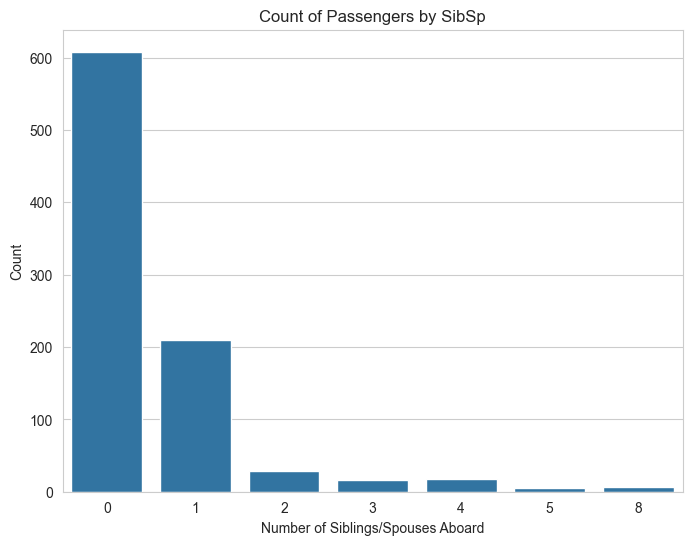

In [457]:
# Đặt kiểu hiển thị của seaborn
sns.set_style('whitegrid')

# Vẽ biểu đồ cột số lượng hành khách theo số anh chị em hoặc con cái đi cùng
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', data=train)

# Thêm tiêu đề và nhãn trục
plt.title('Count of Passengers by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

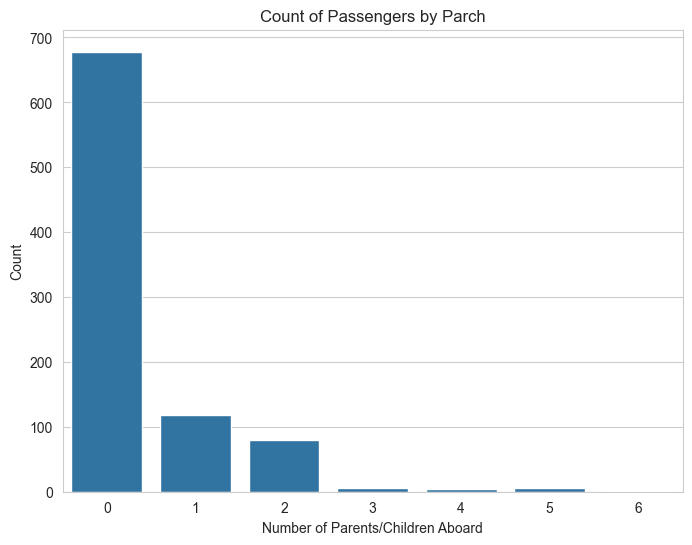

In [458]:
sns.set_style('whitegrid')

# Vẽ biểu đồ cột số lượng hành khách theo số cha mẹ hoặc con cái đi cùng
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', data=train)

# Thêm tiêu đề và nhãn trục
plt.title('Count of Passengers by Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()

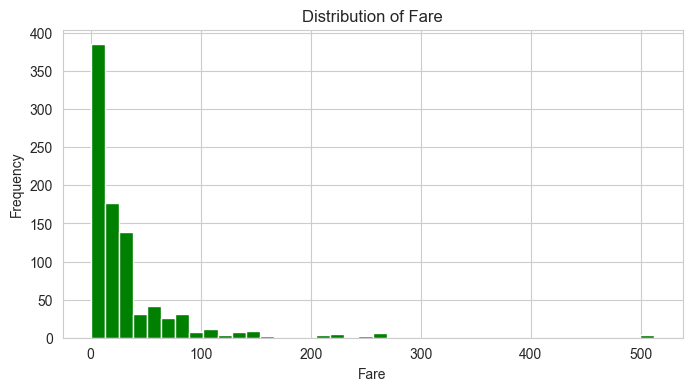

In [459]:

# Vẽ biểu đồ histogram cho cột 'Fare'
plt.figure(figsize=(8, 4))
train['Fare'].hist(color='green', bins=40)

# Thêm tiêu đề và nhãn trục
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

### Data Cleaning

C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\903269678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


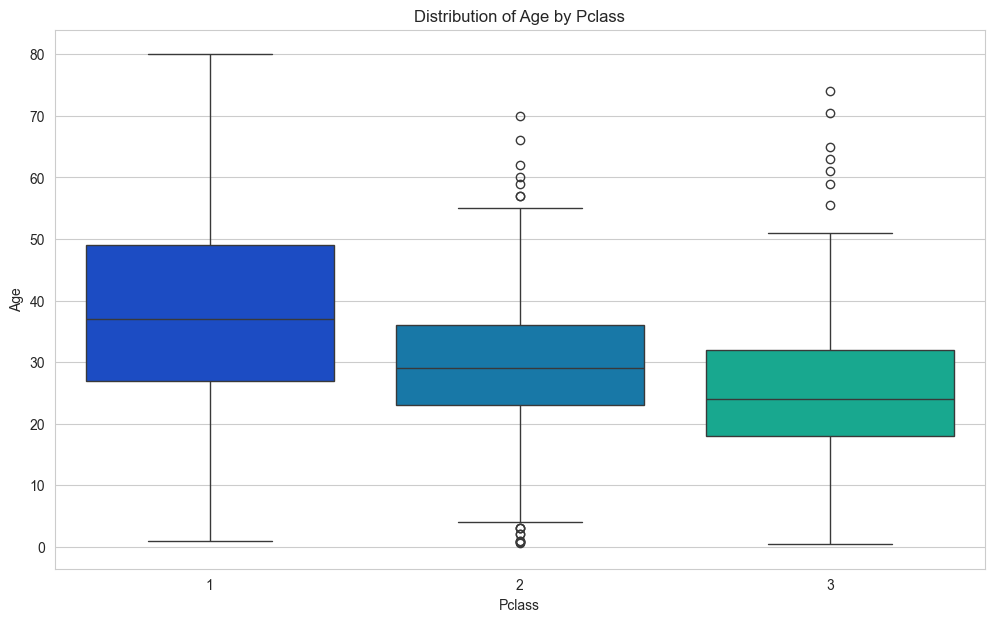

In [460]:
# Đặt kích thước của biểu đồ
plt.figure(figsize=(12, 7))

# Vẽ biểu đồ hộp cho phân phối độ tuổi theo hạng vé
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Thêm tiêu đề và nhãn trục
plt.title('Distribution of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Hiển thị biểu đồ
plt.show()

In [461]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [462]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [463]:
train['Embarked'] = train['Embarked'].fillna('S')


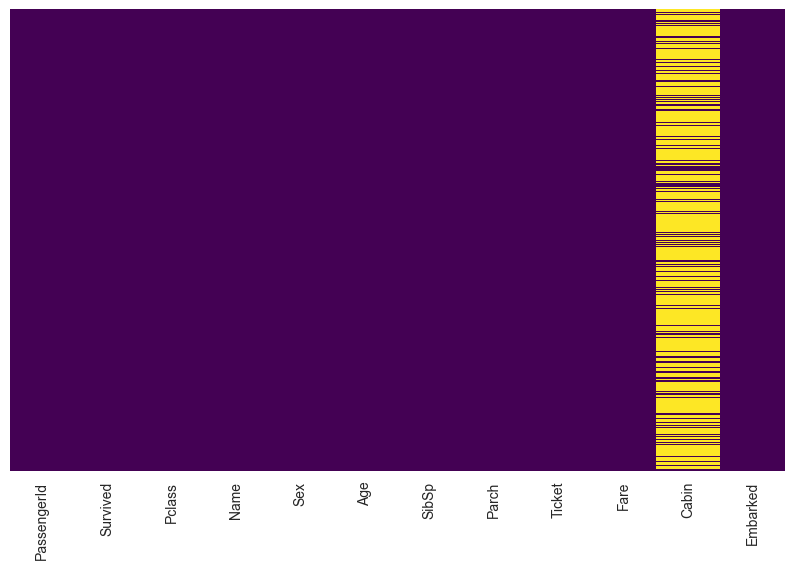

In [464]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Hiển thị biểu đồ
plt.show()

In [465]:
train.drop('Cabin',axis=1,inplace=True)


In [466]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [467]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [468]:
# Chuyển giá trị các cột sang dạng Bolean
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [469]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [470]:
train = pd.concat([train,sex,embark],axis=1)

In [471]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Building a Logistic Regression model


In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

#### Training and Predicting


In [473]:
from sklearn.linear_model import LogisticRegression


In [474]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [475]:
predictions = logmodel.predict(X_test)


In [476]:
print(predictions)


[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1]


In [477]:
from sklearn.metrics import classification_report,confusion_matrix

In [478]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [16 23]]


In [479]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



[[46  5]
 [16 23]]


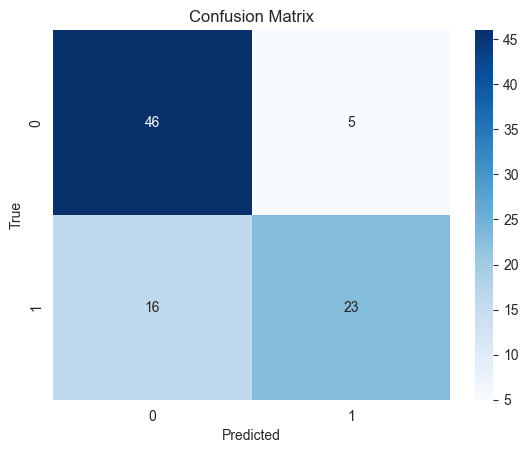

In [480]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

0.804927099044746


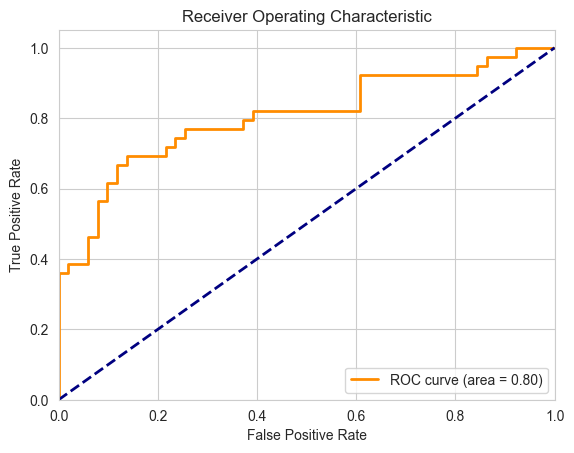

In [481]:
from sklearn.metrics import roc_curve, auc

# Dự đoán xác suất trên tập kiểm tra
y_prob = logmodel.predict_proba(X_test)[:, 1]

# Tính ROC curve và AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Vẽ ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifiction


In [482]:
from sklearn.tree import DecisionTreeClassifier

In [483]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [484]:
dt_pred = dt_model.predict(X_test)

In [485]:
print(dt_pred)

[0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1]


In [486]:
print(confusion_matrix(y_test,dt_pred))

[[44  7]
 [14 25]]


In [487]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



### Random Forest Classification

In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [490]:
rf_pre=rf.predict(X_test)

In [491]:
print(rf_pre)

[0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1]


In [492]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [15 24]]


In [493]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90



C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\277229286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx], palette='viridis')


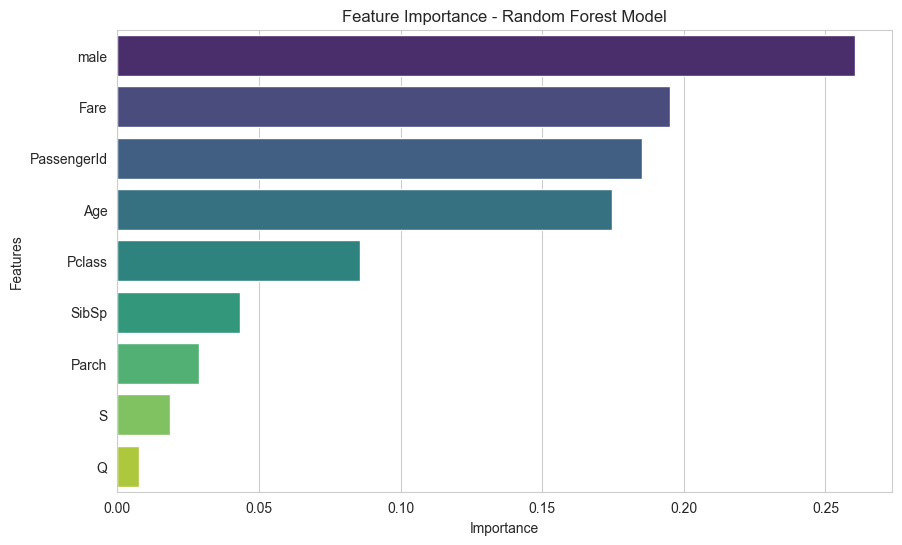

In [494]:
feature_importance = rf.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx], palette='viridis')
plt.title('Feature Importance - Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### ANN

In [495]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [496]:
ann = Sequential()
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [497]:
#ann.fit(X_train, y_train, batch_size=32, epochs=300, verbose=0)


In [498]:
#ann.save("ann_model.h5")

In [499]:
from keras.models import load_model

loaded_model = load_model("ann_model.h5")

In [500]:
ann_pred = loaded_model.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]


In [501]:
print(confusion_matrix(y_test,ann_pred))

[[46  5]
 [12 27]]


In [502]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



### So sánh 4 mô hình

In [503]:
cm_logics=confusion_matrix(y_test,predictions)
cm_ann=confusion_matrix(y_test,ann_pred)
cm_rf=confusion_matrix(y_test,rf_pre)
cm_dt=confusion_matrix(y_test,dt_pred)
print(cm_logics)
print(cm_ann)
print(cm_rf)
print(cm_dt)


[[46  5]
 [16 23]]
[[46  5]
 [12 27]]
[[48  3]
 [15 24]]
[[44  7]
 [14 25]]


| Metric   | 	Logistic Regression     | ANN      | Random Forest | Decision Tree  |
|---------|----------|----------|----------|--------|
|True Positives|23|27|25|24|
|True Negatives|46|46|48|41|
|False Positives|5|5|3|10|
|False Negatives|16|12|14|15|

- TN (True Negative): Số lượng mẫu âm tính thực sự được dự đoán chính xác là âm tính.
- FP (False Positive): Số lượng mẫu âm tính thực sự nhưng được dự đoán sai là dương tính.
- FN (False Negative): Số lượng mẫu dương tính thực sự nhưng được dự đoán sai là âm tính.
- TP (True Positive): Số lượng mẫu dương tính thực sự được dự đoán chính xác là dương tính.

### Bảng Precision, Recall, F1-Score và Support của các mô hình phân loại

| Model            | Precision (0) | Recall (0) | F1-Score (0) | Support (0) | Precision (1) | Recall (1) | F1-Score (1) | Support (1) |
|------------------|---------------|------------|--------------|-------------|---------------|------------|--------------|-------------|
| Random Forest    | 0.77          | 0.94       | 0.85         | 51          | 0.89          | 0.64       | 0.75         | 39          |
| Decision Tree    | 0.75          | 0.84       | 0.80         | 51          | 0.76          | 0.64       | 0.69         | 39          |
| Logistic         | 0.74          | 0.90       | 0.81         | 51          | 0.82          | 0.59       | 0.69         | 39          |
| ANN              | 0.79          | 0.90       | 0.84         | 51          | 0.84          | 0.69       | 0.76         | 39          |





- Random Forest có precision, recall và f1-score cao đối với cả hai lớp 0 và 1, chỉ thấp hơn một chút so với ANN trong việc dự đoán lớp 1.
- Tuy nhiên, Random Forest có precision và recall cao hơn Decision Tree và Logistic Regression cho cả hai lớp.
- Với F1-score tổng thể cũng như hiệu suất cân bằng giữa precision và recall, Random Forest là lựa chọn tốt nhất giữa các mô hình đã được đánh giá.
- Do đó, dựa trên bảng đánh giá, mô hình tốt nhất để sử dụng trong trường hợp này là Random Forest.

### Sử dụng ANN dự đoán trên tập dữ liệu khác

In [504]:
test = pd.read_csv('test.csv')

<Axes: >

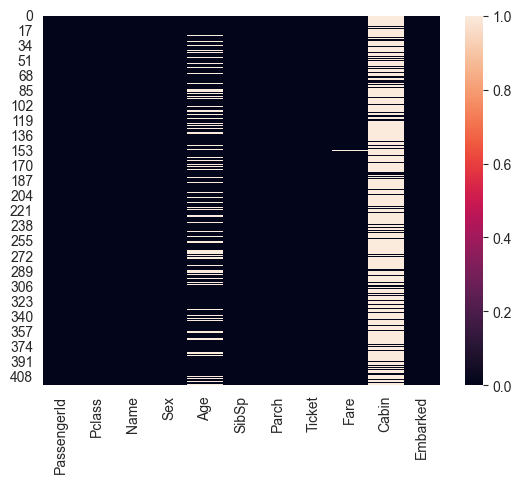

In [505]:
sns.heatmap(test.isnull())


In [506]:
test.drop('Cabin',axis=1,inplace=True)

In [507]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\3907505379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [508]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [509]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [510]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [511]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [512]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [513]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [514]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [515]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [516]:
test_prediction = loaded_model.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [517]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [518]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [519]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,True,True,False,0
1,893,3,47.0,1,0,7.0000,False,False,True,0
2,894,2,62.0,0,0,9.6875,True,True,False,0
3,895,3,27.0,0,0,8.6625,True,False,True,0
4,896,3,22.0,1,1,12.2875,False,False,True,0


In [520]:
df= new_test[['PassengerId' ,'Survived']]

In [521]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [522]:
df.to_csv('predictions.csv' , index=False)

### K-mean Cluster

#### Sử dụng phương pháp Elbow

In [523]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [524]:
train['male'] = train['male'].astype(int)
train['Q'] = train['Q'].astype(int)
train['S'] = train['S'].astype(int)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [525]:
train_kmeans=train[[ 'Age', 'Fare']]

In [526]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(train_kmeans)

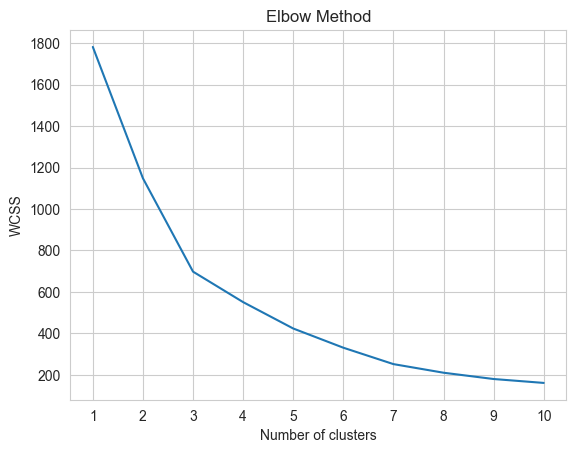

In [527]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sử dụng phương pháp "elbow method" để chọn số lượng cụm
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()




In [528]:
# Áp dụng K-means với số cụm tối ưu. Cluster xác định dựa trên giá trị khoảng nào có sự biến động thấp nhất
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [529]:
# Thêm thông tin cụm vào tập dữ liệu gốc
train_kmeans['Cluster'] = clusters
train_kmeans.head()



C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\2255193018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_kmeans['Cluster'] = clusters


,Age,Fare,Cluster
0,22.0,7.2500,1
1,38.0,71.2833,4
2,26.0,7.9250,1
3,35.0,53.1000,0
4,35.0,8.0500,0


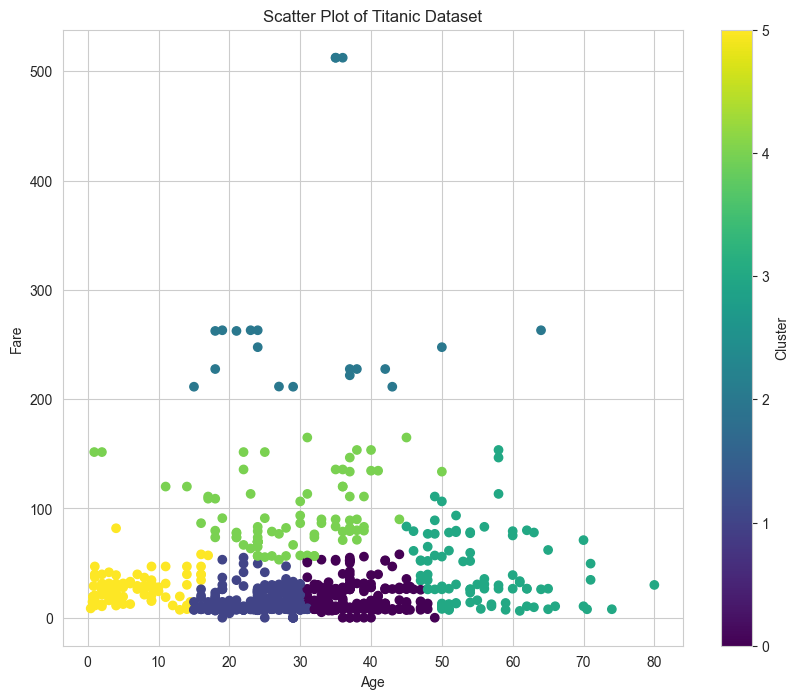

In [530]:

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter( train_kmeans['Age'],train_kmeans['Fare'], c=train_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Titanic Dataset')
plt.colorbar(label='Cluster')
plt.show()

- Cluster 5: chỉ những vị khách trẻ tuổi dưới 20 .Giá vé thấp, hầu hết dưới 50
- Cluster 0,1:Chỉ những vị khách hầu hết từ 20-40:Giá vé dưới 100 chỉ những hành khách trung bình, không thuộc nhóm thượng lưu hoặc phổ thông
- Cluster 3:Chỉ những vị khách lớn hơn 50.Giá vé trung bình, hầu hết dưới 100.Hành khách trong cụm này có thể thuộc nhóm người trung niên và cao tuổi với mức chi trả trung bình cho vé
- Cluster 4:Chỉ những vị khách hầu hết từ 20-40 giá vé trung bình tầm 100 bao gồm nhiều tầng lớp khác nhau.
- Cluster 2: Chỉ những vị khách có sự đa dạng về tuổi giá vé trung bình trên 200 chỉ những vị khách thuộc lớp thượng lưu


### Sử dụng phương pháp Silhouette

In [537]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


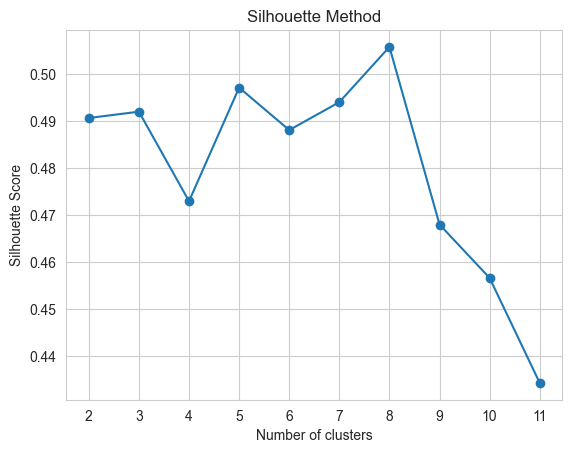

In [532]:
# Vẽ biểu đồ Silhouette
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 12))
plt.grid(True)
plt.show()

In [533]:
# Chọn số cụm tối ưu dựa trên Silhouette score cao nhất
optimal_clusters = range(2, 12)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 8


In [534]:
# Áp dụng K-means với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [535]:
# Thêm thông tin cụm vào tập dữ liệu gốc
train_kmeans['Cluster'] = clusters




C:\Users\Admin\AppData\Local\Temp\ipykernel_2776\1598898777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_kmeans['Cluster'] = clusters


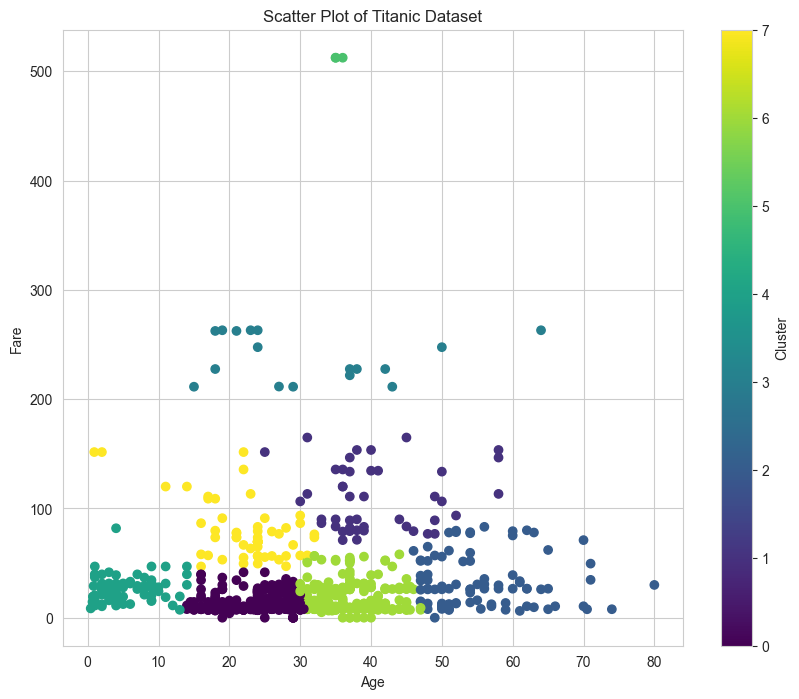

In [536]:

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter( train_kmeans['Age'],train_kmeans['Fare'], c=train_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Titanic Dataset')
plt.colorbar(label='Cluster')
plt.show()

- Cluster 4: Chỉ những vị khách độ tuổi từ 0-10.Thuộc nhóm khách hàng nhỏ tuổi đi cùng gia đình
- Cluster 0:Chỉ những vị khách độ tuổi từ 15-30. Không thuộc nhóm thượng lưu hay phổ thông.Gia vé trung bình dưới 50
- Cluster 6: Chỉ những vị khách độ tuổi trung niên từ 30-50.Không thuộc nhóm thượng lưu hay phổ thông.Giá vé trung bình dưới 50
- Cluster 2: Chỉ những vị khách từ 50 tuổi trở lên.Họ Không thuộc nhóm thượng lưu hay phổ thông.Giá vé trung bình tầm 50
- Cluster 7: Chỉ những vị khachs từ 15-30.Có sự đa dạng tầng lớp ở đây.Giá vé trung bình dưới 100
- Cluster 3:Có sự đa dạng về độ tuổi họ là những vị khách thuộc tầng lớp thượng lưu với giá vé trung bình trên 200
- Cluster 1:Độ tuổi từ 30-50. Thuộc tầng lớp thượng lưu với giá vé trung bình trên 100
- Cluster 5: Chỉ các vị khách thuộc giới thượng lưu với giá vé trên 500
